In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
p = 0.4

In [3]:
def get_valid_action_range(s):
    return range(1, min(s, N - s)+1)

def Q(v, s, a):
    N = v.size - 1
    if s < 1 or N <= s:
        raise Exception("invalid s: %d" % s)
    if a < 1 or s < a or N < s + a:
        raise Exception("invalid (s, a): (%d, %d)" % (s, a))
    return (1-p) * v[s - a] + p * v[s + a]

def value_iteration(v):
    N = v.size - 1
    newV = np.empty_like(v)
    newV[0], newV[-1] = 0, 1
    
    for s in range(1, N):
        newV[s] = np.max([Q(v, s, a) for a in get_valid_action_range(s)])
    
    return newV

def get_best_actions(v, s, n = 1):
    values = [(Q(v, s, a), a) for a in get_valid_action_range(s)]
    values = sorted(values, reverse=True)[:n]
    return [a for q, a in values]

def plot_results(V):
    N = V.size - 1
    plt.figure(figsize=(16, 9))
    y1 = [get_best_actions(V, i, 1)[0] for i in range(1, N)]
    y2 = [get_best_actions(V, i, 2)[1] for i in range(2, N - 1)]
    y3 = [get_best_actions(V, i, 3)[2] for i in range(3, N - 2)]
    plt.plot(range(1, N), y1, '.')
    plt.plot(range(2, N - 1), y2, '.')
    plt.plot(range(3, N - 2), y3, '.')

    plt.legend(["best1", "best2", "best3"])
    plt.show()

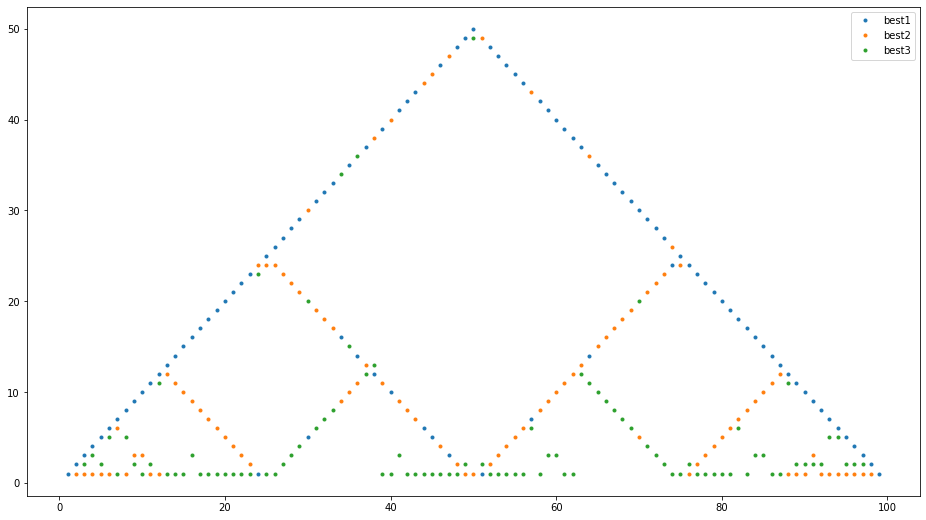

In [4]:
N = 100
V = np.zeros(N + 1, dtype=np.float64)
for _ in range(1000):
    V = value_iteration(V)

plot_results(V)

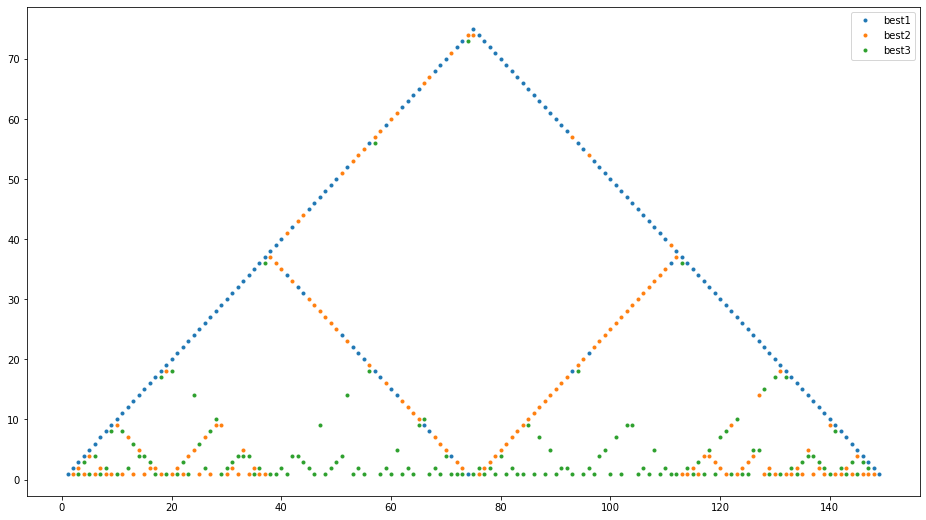

In [5]:
N = 150
V = np.zeros(N + 1, dtype=np.float64)
for _ in range(1000):
    V = value_iteration(V)

plot_results(V)

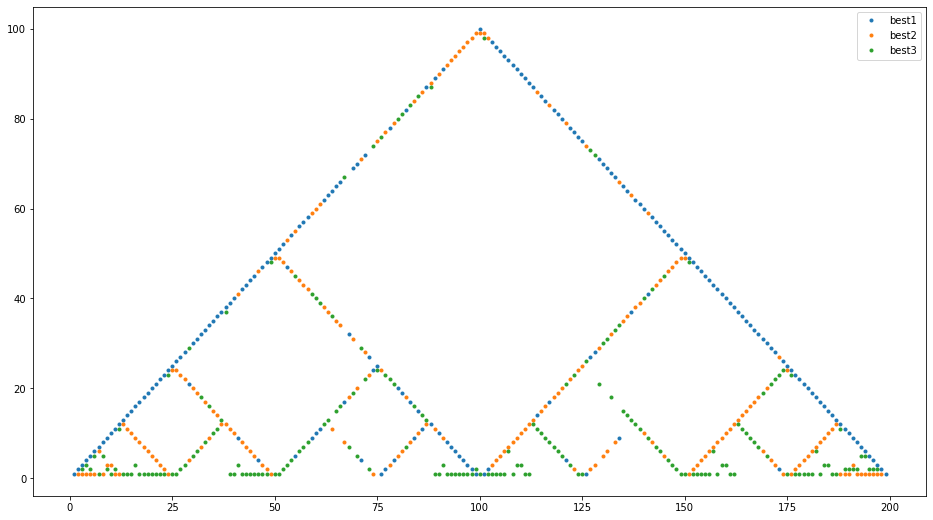

In [6]:
N = 200
V = np.zeros(N + 1, dtype=np.float64)
for _ in range(1000):
    V = value_iteration(V)

plot_results(V)